In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
reeses = cv2.imread('Computer-Vision-with-Python/DATA/reeses_puffs.png', 0)

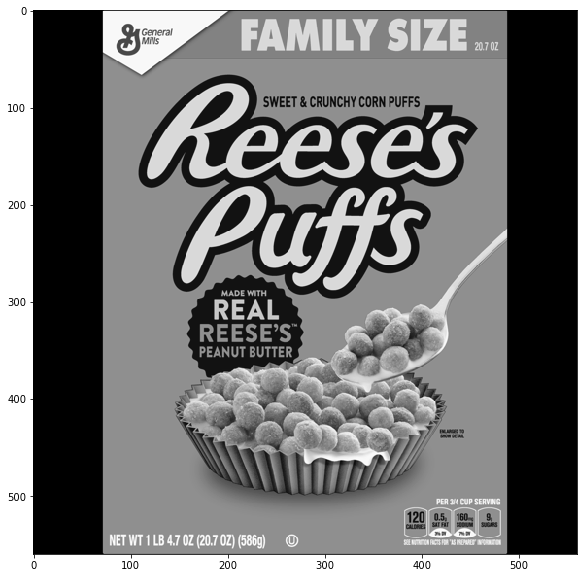

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('Computer-Vision-with-Python/DATA/many_cereals.jpg', 0)

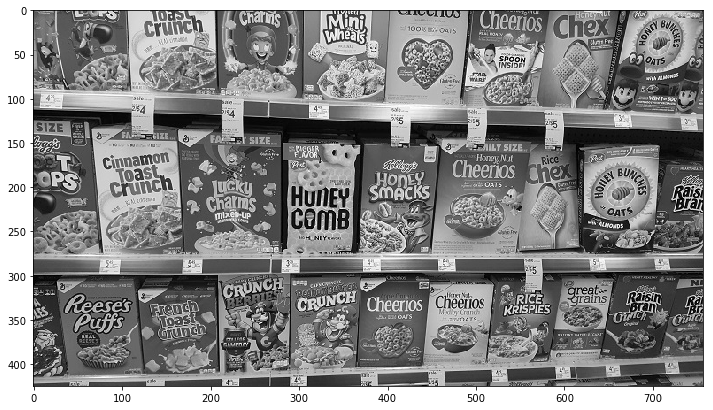

In [6]:
display(cereals)

In [7]:
#BRUTE FORCE DETECTION WITH ORB DETECTOR METHOD

orb = cv2.ORB_create()

In [8]:
kp1,des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [10]:
matches = bf.match(des1, des2)

In [11]:
single_match = matches[0]

In [12]:
single_match.distance

78.0

In [13]:
matches = sorted(matches, key=lambda x:x.distance)

In [14]:
len(matches)

263

In [15]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

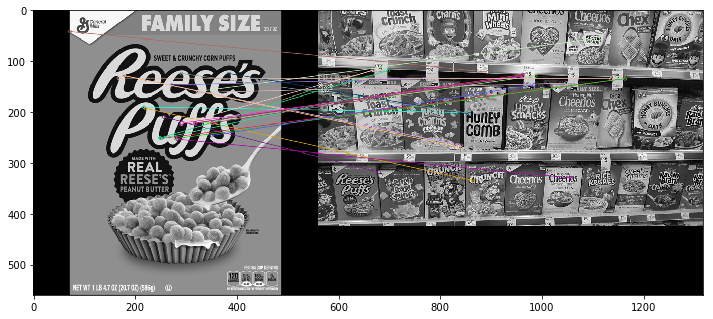

In [16]:
display(reeses_matches)

In [17]:
#SCALE INVARIANT FEATURE TRANSFORM (SIFT) DESCRIPTOR METHOD

In [18]:
sift = cv2.xfeatures2d.SIFT_create()

In [19]:
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals, None)

In [20]:
bf = cv2.BFMatcher()

In [21]:
matches = bf.knnMatch(des1, des2, k=2)

In [22]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [23]:
len(good)

78

In [24]:
len(matches)

1500

In [25]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

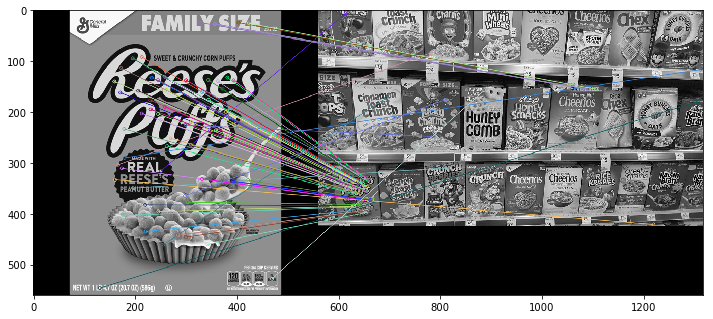

In [26]:
display(sift_matches)

In [27]:
sift = cv2.xfeatures2d.SIFT_create()

In [28]:
kp1,des1 = sift.detectAndCompute(reeses, None)
kp2,des2 = sift.detectAndCompute(cereals, None)

In [29]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [30]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [31]:
matches = flann.knnMatch(des1, des2, k=2)

In [32]:
matchesMask = [[0,0] for i in range(len(matches))]

In [33]:
good = []

for i, (match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [34]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(175,0,175),
                  matchesMask=matchesMask,
                  flags=0)

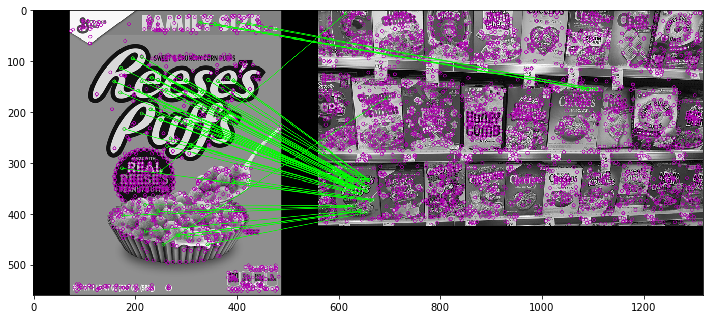

In [35]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)

In [36]:
## WATERSHED ALGORITHM

In [37]:
sep_coins = cv2.imread("Computer-Vision-with-Python/DATA/pennies.jpg")

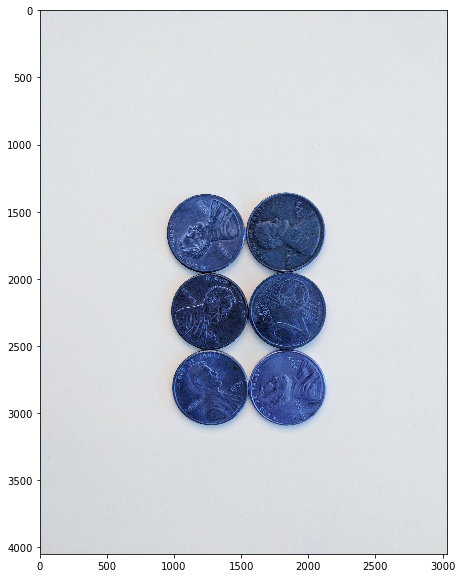

In [38]:
display(sep_coins)

In [39]:
# MEDIUM BLUR
# GRAYSCALE
# BINARY THRESHOLD
# FIND CONTOURS

In [40]:
sep_blur = cv2.medianBlur(sep_coins, 25)

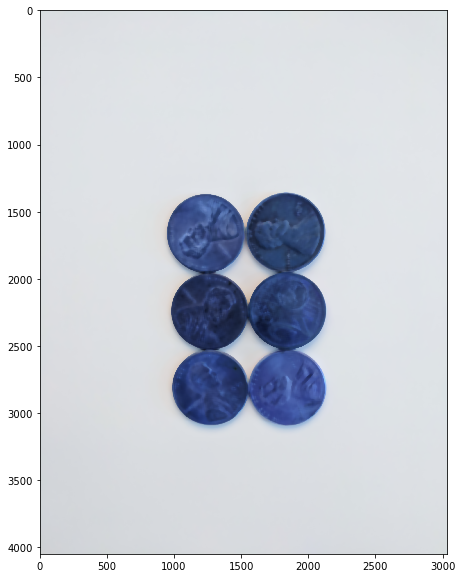

In [41]:
display(sep_blur)

In [42]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

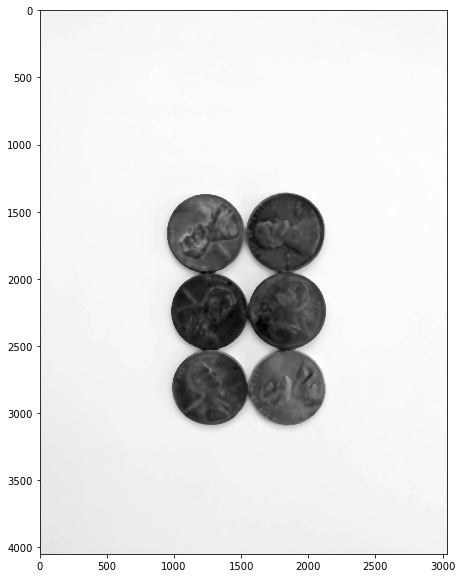

In [43]:
display(gray_sep_coins)

In [44]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)

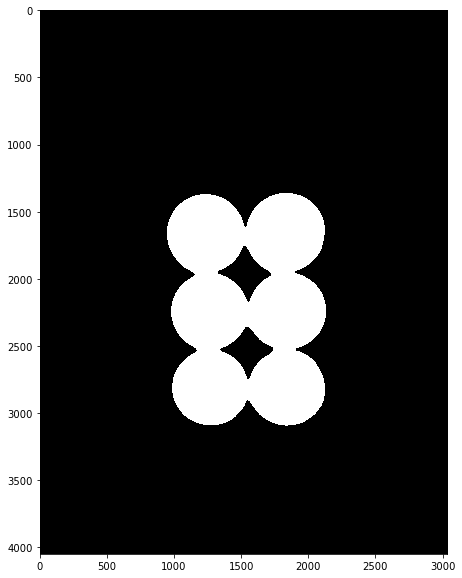

In [45]:
display(sep_thresh)

In [46]:
image,contours,hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [47]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

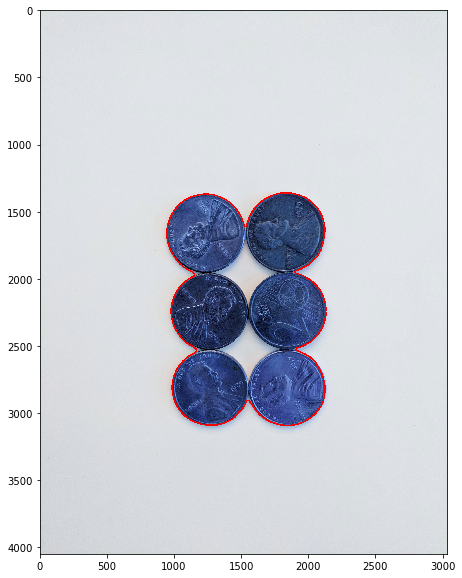

In [48]:
display(sep_coins)

In [49]:
img = cv2.imread("Computer-Vision-with-Python/DATA/pennies.jpg")

In [50]:
img = cv2.medianBlur(img, 35)

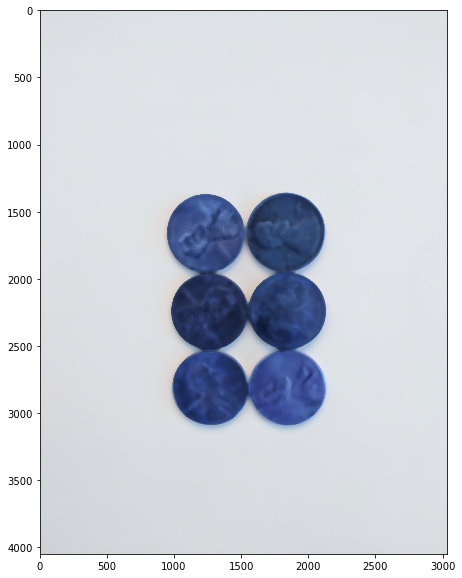

In [51]:
display(img)

In [52]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [56]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

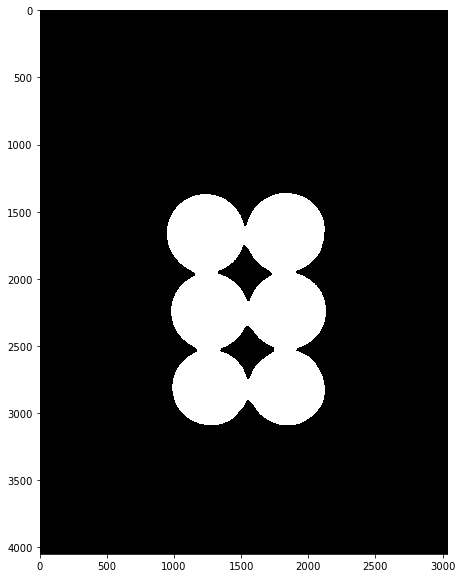

In [57]:
display(thresh)

In [58]:
# NOISE REMOVAL (OPTIONAL HERE)

In [59]:
kernel = np.ones((3,3), np.uint8)

In [60]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [61]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

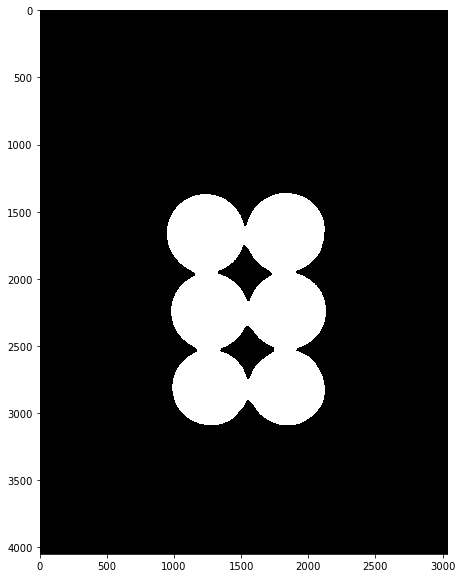

In [62]:
display(opening)

In [63]:
# Looks the same:
# Can be done in 1 of 2 ways:
# 1) More complex Thresholding options (as seen above)
# 2) Noise Removal

In [70]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

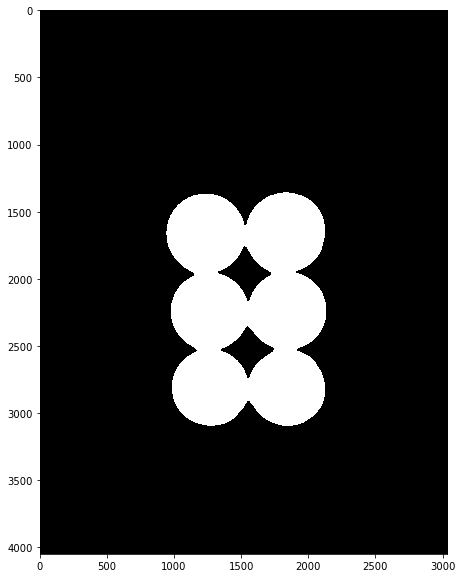

In [71]:
display(sure_bg)

In [64]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

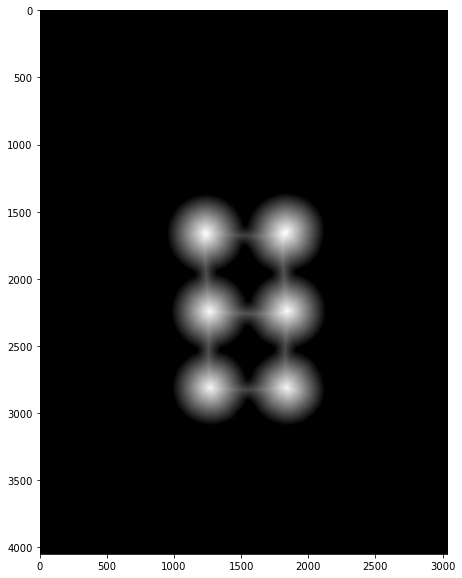

In [65]:
display(dist_transform)

In [66]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

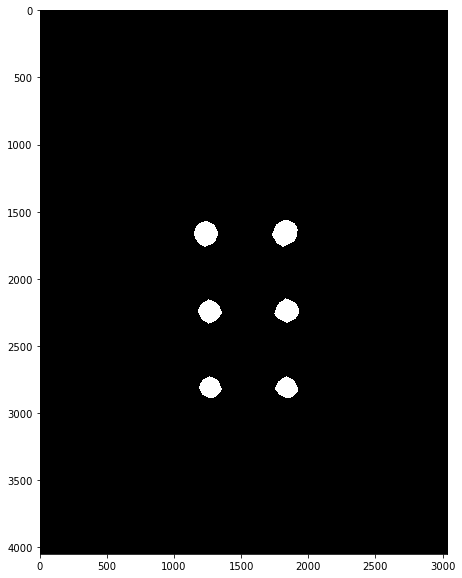

In [67]:
display(sure_fg)

In [68]:
sure_fg = np.uint8(sure_fg)

In [72]:
unknown = cv2.subtract(sure_bg, sure_fg)

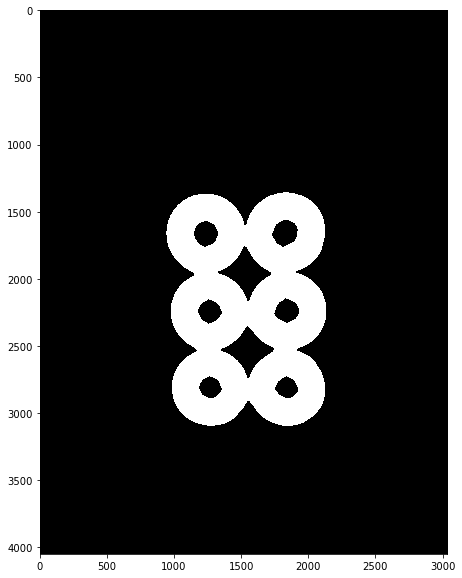

In [73]:
display(unknown)

In [74]:
ret, markers = cv2.connectedComponents(sure_fg)

In [76]:
markers = markers + 1

In [77]:
markers[unknown == 255] = 0

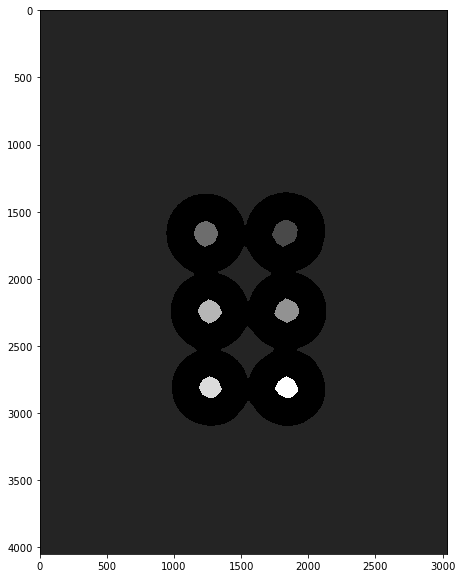

In [78]:
display(markers)

In [79]:
markers = cv2.watershed(img, markers)

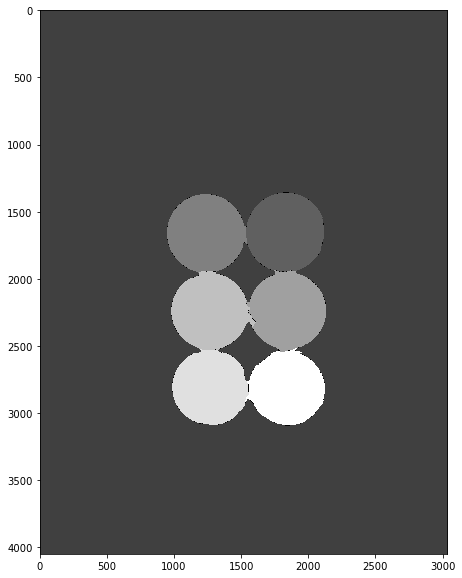

In [80]:
display(markers)

In [81]:
image,contours,hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

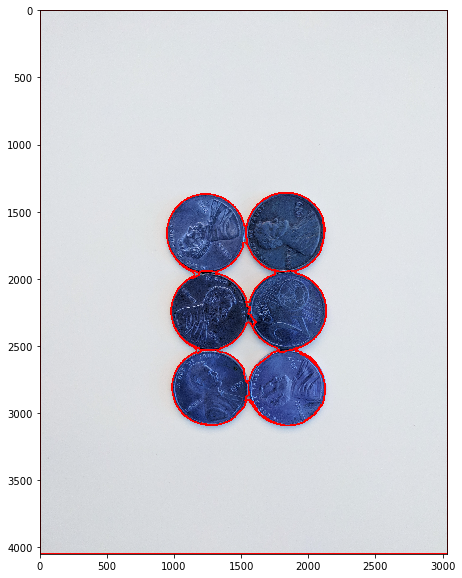

In [82]:
display(sep_coins)